khhl


# Working With Data



## Outline

- The Python scientific stack
- `numpy` and its `ndarray`
- `pandas` and its `DataFrame`
- Brief overview of `scipy`, `timeseries`, and `scikit-learn`

# The Python _Scientific Stack_

Originally:
- `numpy` for its efficient array data structure
- `scipy` for numerical analysis methods
- `matplotlib` for advanced 2D plotting

Today we will also cover:
- `pandas` a powerful data frame object

- `scikit-learn` for clustering and classification (machine learning) - intro

# `numpy`

- `numpy` is an important module _outside_ of the Python standard library
- It is bundled with Anaconda 3
- The heart of scientific computing in Python

In [2]:
# numpy is imported under the shortcut <np>
import numpy as np

# the `numpy.ndarray`
- At the core of numpy is the `numpy.ndarray`
- A class representing an *n*-dimensional array
- Vectors of numbers are 1-dimensional arrays
  - _We've represented these as lists_
- Matrices of numbers are 2-dimensional arrays
  - _We've represented these as lists of lists_
- `numpy.ndarray`s can have arbitrarily many dimensions
  - _though 1 and 2 are most common_

In [2]:
help( np.ndarray )

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

# making an `numpy.ndarray`

- We typically make `numpy.ndarrays` with the convenience function `numpy.array`
- For this reason, we often shorthand `numpy.ndarray` to just "array"
- We can turn a Python `list` into an array, for example:

In [3]:
np.array( [1,2,3,5,7] )

array([1, 2, 3, 5, 7])

In [4]:
# let's put that array in the variable <a> so we can work with it
a = np.array( [1,2,3,5,7] )
print(a)

[1 2 3 5 7]


In [8]:
# we can index into an array like a list
a[4]

7

array[ start: end ]

In [13]:
# we can slice from an array like a list as well
a[2 :5 ]

array([3, 5, 7])

In [7]:
# we can similarly define a 2d array
b = np.array( [ [1,2,3],[4,5,6],[7,8,9] ] )
print(b.shape)

(3, 3)


In [21]:
c = np.array( [ [1,2,0],[4,5,6] ] )
c.shape
c[1, :]

array([4, 5, 6])

In [17]:
# the "dimensions" of an array are stored in an attribute, <shape>
b.shape


(3, 3)

In [21]:
# the length of <shape> is the dimensionality of the array
len( b.shape )

2

In [23]:
# slicing/indexing a 2d array is easier than with a list of lists
print( b )

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
# indexing directly into the 2d array gives a 1d array
b[1,2]

6

In [24]:
# unlike lists of lists, we can index other dimensions using the <:> operator
b[1,0]

4

2_darray [ rows , column] 

In [9]:
# we can slice out a chunk of the array easily
b[1:,1:]

array([[5, 6],
       [8, 9]])

np.b[ start row : end row , start col: end col]

# Which of the followings can result in a two dimensional array?

`np.array([[11,12,13],[21,22,23]])` #1

`np.array([11,12,13,21,22,23])` #2

`np.array([11,12,13],[21,22,23])` #3

`np.array[[11,12,13,21,22,23]] `#4

In [20]:
np.array([[11,12,13],[21,22,23]])

array([[11, 12, 13],
       [21, 22, 23]])

In [21]:
np.array([11,12,13,21,22,23])

array([11, 12, 13, 21, 22, 23])

In [22]:
np.array([11,12,13],[21,22,23])

TypeError: Field elements must be 2- or 3-tuples, got '21'

In [23]:
np.array[[11,12,13,21,22,23]]

TypeError: 'builtin_function_or_method' object is not subscriptable

# Mathematical operations on arrays
- Behave _very differently_ from operations on `list`s
- More "mathy" (but not exactly the same as matrix math!)

In [24]:
# duplication
2 * [1,2,3]

[1, 2, 3, 1, 2, 3]

In [25]:
# multiplication by a constant
2 * np.array( [1,2,3] )

array([2, 4, 6])

In [26]:
# concatenation
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]

In [27]:
# element-wise addition
np.array( [1,2,3] ) + np.array( [1,2,3] )

array([2, 4, 6])

# Some aspects of array math have no list equivalents

In [28]:
# broadcasting
1 + np.array( [1,2,3] )

array([2, 3, 4])

In [29]:
# will not work
1 + [1,2,3]

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [31]:
# element-wise product
np.array( [1,2,3] ) * np.array( [1,2,3] )

array([1, 4, 9])

In [31]:
# will not work
[1,2,3] * [1,2,3]

TypeError: can't multiply sequence by non-int of type 'list'

- Element-wise multiplication works on pairs of arrays with the same shape

In [32]:
A = np.array( [[1,2],[3,4]] )
A

array([[1, 2],
       [3, 4]])

In [33]:
B = np.array( [[0,1],[1,0]] )
B

array([[0, 1],
       [1, 0]])

In [34]:
A * B

array([[0, 2],
       [3, 0]])

In [35]:
# use <np.matmul> for proper matrix multiplication of 2d arrays
np.matmul( A, B )

array([[2, 1],
       [4, 3]])

# Advanced indexing

In [22]:
print (2 * np.array(range(1, 9, 2)) )


[ 2  6 10 14]


In [23]:
a = 2 * np.array( range(9) )
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [40]:
# index by a list of positions
a[[1,3,5]]

array([ 2,  6, 10])

In [24]:
# index with a yes/no (True/False) call for each position
a % 3 == 0

array([ True, False, False,  True, False, False,  True, False, False])

In [29]:
a[a % 4 == 0]

array([ 0,  4,  8, 12, 16])

In [43]:
a[a > 5]

array([ 6,  8, 10, 12, 14, 16])

# Vectorized functions

- Arrays are designed to be used with _vectorized_ functions
- Vectorized functions avoid explicit loops over arrays, which are slow (relatively speaking)
- `numpy` contains many vectorized versions of common functions

In [44]:
b = np.array( [[1,2,3],[4,5,6],[7,8,9]] )
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
# the sum of all 2d array elements
np.sum( b )

45

In [46]:
# the sum over the first axis (note base-0 counting)
np.sum( b, axis=0 )

array([12, 15, 18])

In [43]:
# the sum over the second axis
np.sum( b, axis=1 )

array([ 6, 15, 24])

# Arrays and vectorized computation are fast

In [44]:
# let's make a big list and array equivalent
import random
x = []
for k in range( 1000000 ):
    x.append( random.random( ) )
y = np.array( x ) # <- array equivalent of same numbers

In [49]:
%timeit -n 100 np.sum( y )

1.2 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%timeit -n 100 sum( x )

6.04 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
# a manual loop is even slower
def my_sum( numbers ):
    ret = 0
    for n in numbers:
        ret = ret + n
    return ret

In [47]:
%timeit -n 100 my_sum( x )

38 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Other ways to make arrays

In [54]:
# an array of ones of a specified shape
np.ones( [2, 3] , dtype= np.float64)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [55]:
# an array of zeroes of a specified shape (note the spelling)
np.zeros( [2, 3], dtype= int )

array([[0, 0, 0],
       [0, 0, 0]])

In [30]:
np.eye(4 ,dtype=int)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

np.arange( start, end, steps)

In [52]:
# range equivalent
np.arange( 0, 2.1, 0.2 )

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [60]:
np.full((3,4), 0.1)

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]])

In [79]:
# load from a file (by default splits rows on any whitespace)
a = np.genfromtxt( "10-rows-of-numbers.tsv" , delimiter="\t")
a

array([[ 8.,  9.,  2.,  6.,  3.],
       [ 5.,  7., 10.,  6.,  3.],
       [ 7.,  8.,  6.,  0.,  9.],
       [ 3.,  6.,  0.,  1.,  1.],
       [ 3.,  6.,  4.,  8.,  3.],
       [ 1.,  9.,  9.,  3.,  9.],
       [ 0.,  9.,  4.,  9.,  1.],
       [ 8.,  4.,  5.,  6.,  4.],
       [ 3.,  0.,  9.,  2.,  1.],
       [ 2.,  3.,  7.,  7.,  9.]])

In [74]:
np.max(a[3:5, :4])

8.0

In [65]:
# replicating elements of hw4
column = 1
print( "MEAN =", np.mean( a[:, column] ), "MEDIAN =", np.median( a[:, column] ) )

MEAN = 6.1 MEDIAN = 6.5


# Element types
- Arrays try to force their elements to be floating-point numbers.
- We can tell arrays to **coerce** data to another type.
- Unlike `lists`, all array elements have to have the save type.
  - _This is part of where the efficiency of arrays comes from._

In [84]:
# coercing to integers
np.genfromtxt( "10-rows-of-numbers.tsv", dtype=int  )[0:5]

array([[ 8,  9,  2,  6,  3],
       [ 5,  7, 10,  6,  3],
       [ 7,  8,  6,  0,  9],
       [ 3,  6,  0,  1,  1],
       [ 3,  6,  4,  8,  3]])

In [81]:
np.genfromtxt( "10-rows-of-numbers.tsv", dtype=float )[3:-1]

array([[3., 6., 0., 1., 1.],
       [3., 6., 4., 8., 3.],
       [1., 9., 9., 3., 9.],
       [0., 9., 4., 9., 1.],
       [8., 4., 5., 6., 4.],
       [3., 0., 9., 2., 1.]])

# What is a data frame?
- A data frame is special kind of 2d array
- Each row represents one "sample" or "observation"
  - _These may be named, but it's not required_
- Each column represents a particular type of measurement
  - _Each column must have a unique name_
  - _The data in a single column are all of the same type_
- Very common (and important) in all sorts of statistical modeling

- Along with the data, you can optionally pass `index` (row labels) and `columns` (column labels) arguments. 
- If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. 

# The `pandas` DataFrame
- The `pandas` module implements a powerful data frame class

In [85]:
# pandas is typically imported as pd
import pandas as pd

In [86]:
# we can build a DataFrame with a dictionary of lists (or arrays) of the same length
data = {
    "Name": ["Alice", "Bob", "Carol"],
    "Height": [1.45, 1.83, 1.34],
    "Age": [23, 45, 91],
}

In [87]:
# data frames are often abbreviated df
pd.DataFrame( data )

,Name,Height,Age
0,Alice,1.45,23
1,Bob,1.83,45
2,Carol,1.34,91


- It is much more common to load these sort of data from a file

In [92]:
# note that the file doesn't have to be a csv, despite the name of the method
df = pd.read_csv( "iris-renamed.tsv", sep="\t" )


In [93]:
df.head(10)

,sepal_width,sepal_length,petal_width,petal_length,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [95]:
df.tail(10)

,sepal_width,sepal_length,petal_width,petal_length,label
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [96]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [98]:
df.columns

Index(['sepal_width', 'sepal_length', 'petal_width', 'petal_length', 'label'], dtype='object')

# Indexing columns

In [97]:
# We can index particular columns using their names like dictionary keys
df["label"].tail()

145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: label, dtype: object

In [99]:
# the read_csv method makes smart choices about data types
df["petal_width"].head( )

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_width, dtype: float64

In [103]:
# can also access columns with "namespace"-style naming
df.sepal_length.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_length, dtype: float64

# Indexing rows

In [104]:
# rows are indexed with the .iloc attribute
df.iloc[0]

sepal_width             5.1
sepal_length            3.5
petal_width             1.4
petal_length            0.2
label           Iris-setosa
Name: 0, dtype: object

In [104]:
# slicing works too
df.iloc[3:8]

,sepal_width,sepal_length,petal_width,petal_length,label
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


# Advanced row indexing

In [105]:
# Like arrays, we can slice rows using Boolean vectors
df[df.sepal_width > 7.5]

,sepal_width,sepal_length,petal_width,petal_length,label
105,7.6,3.0,6.6,2.1,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [110]:
df_virginica = df[df.label == "Iris-virginica"]
df_virginica.head()

,sepal_width,sepal_length,petal_width,petal_length,label
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


Selecting on a multi-axis by label:

DataFrame.loc[ start: end , [column1,colmn2,..] ]

In [107]:
df.loc[1:5, ["petal_width","label"] ]

,petal_width,label
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
5,1.7,Iris-setosa


DataFrame.nlargest(n, columns, keep='first')

*  Return the first n rows ordered by columns in descending order.

* Return the first n rows with the largest values in columns, in descending order. The columns that are not specified are returned as well, but not used for ordering.

In [111]:
# pandas also includes convenience selection methods
df.nlargest( 5, "sepal_length", keep = "first")

,sepal_width,sepal_length,petal_width,petal_length,label
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [111]:
df.nlargest( 10, "sepal_length", keep = "first")

,sepal_width,sepal_length,petal_width,petal_length,label
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa


# Data Exploration
- Pandas includes a lot of useful functions for data exploration

In [115]:
# descriptive statistics for numerical columns
df.describe( )

,sepal_width,sepal_length,petal_width,petal_length
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
# same idea, but only for rows of a certain label
df[df.label == "Iris-setosa"].describe( )

,sepal_width,sepal_length,petal_width,petal_length
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [117]:
# regroup a data frame by a categorical feature
groups = df.groupby( "label" )

In [118]:
# aggregate groups by some function
groups.agg( "mean" )

,sepal_width,sepal_length,petal_width,petal_length
label,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


# More Statistics Functions
func = min(), max(), mode(), median()
- The general syntax for calling these functions is
- data_frame.func()
- Frequently used optional parameter: 
        • axis = 0 (rows) or 1 (columns)

In [119]:
df.min()

sepal_width             4.3
sepal_length            2.0
petal_width             1.0
petal_length            0.1
label           Iris-setosa
dtype: object

In [120]:
df.std()

sepal_width     0.828066
sepal_length    0.433594
petal_width     1.764420
petal_length    0.763161
dtype: float64

In [121]:
df.median()

sepal_width     5.80
sepal_length    3.00
petal_width     4.35
petal_length    1.30
dtype: float64

In [123]:
df.mode()

,sepal_width,sepal_length,petal_width,petal_length,label
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


# Plotting

* Python's plotting engine is `matplotlib`
* `Seaborn` is a nice wrapper around `matplotlib` for making simple plots easy
* `Seaborn` works nicely with `pandas` data frames AND Jupyter Notebooks

In [124]:
# seaborn is traditionally imported as sns
import seaborn as sns

C:\Users\abdulaziz.yahya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

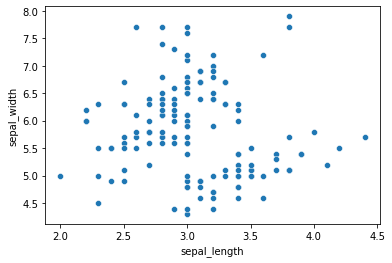

In [125]:
# let's make a scatterplot using our dataframe
sns.scatterplot( "sepal_length", "sepal_width", data=df )

C:\Users\abdulaziz.yahya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

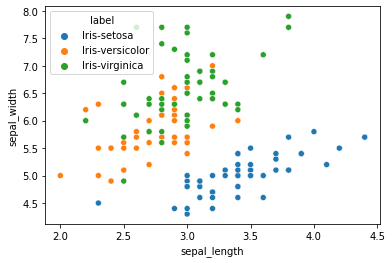

In [126]:
# let's make a scatterplot using our dataframe
sns.scatterplot( "sepal_length", "sepal_width", hue="label", data=df )

<AxesSubplot:xlabel='label', ylabel='sepal_length'>

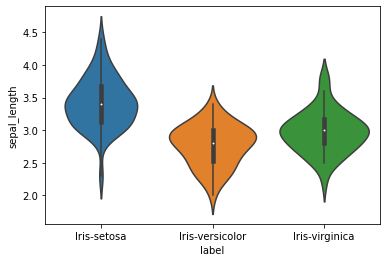

In [127]:
# let's make a scatterplot using our dataframe
sns.violinplot( x="label", y="sepal_length", data=df )

# Plot galleries

* Check out https://seaborn.pydata.org/examples/index.html for a gallery of the different sorts of plots you can easily produce with `seaborn`.

  * Each with associated Python code!

* There is a similar gallery for `matplotlib` at https://matplotlib.org/gallery.html. `matplotlib` is particularly useful for drawing weird, custom plots that aren't nicely defined in `seaborn`.

  * Doing this requires a fair amount of code, however.

# Going further with arrays and data frames
- Most scientific computing in Python can be done with basic data types (`lists`, `dicts`)
- Working with `numpy` arrays and/or `pandas` data frames is often easier and generally faster
- The `numpy.ndarray` and `pandas.DataFrame` are individually very powerful and contain many useful methods
- Google/consult the docs as needed

# The `scipy` module
- Contains a wide variety of functions for scientific data analysis
- Examples: optimization, clustering, signal and image processing, and statistical testing
- Increasingly being broken apart into specialized "scientific kits" (scikits)

In [128]:
from scipy.stats import mannwhitneyu, spearmanr

In [129]:
# index the rows corresponding to each label, then extract their properties
petal_s = df[df.label == "Iris-setosa"].petal_width
sepal_s = df[df.label == "Iris-setosa"].sepal_width
petal_v = df[df.label == "Iris-virginica"].petal_width

In [130]:
mannwhitneyu( petal_s, petal_v )

MannwhitneyuResult(statistic=0.0, pvalue=2.824216432866686e-18)

In [131]:
spearmanr( petal_s, sepal_s )

SpearmanrResult(correlation=0.2682458533946559, pvalue=0.05963391442997878)

# The `statsmodels` module
- Regression analysis in Python using R-like syntax

In [135]:
import statsmodels.formula.api as smf

In [136]:
results = smf.ols( "petal_width ~ sepal_width + C(label)", data=df )

In [137]:
results.summary( )

AttributeError: 'OLS' object has no attribute 'summary'

# The `scikit-learn` module
- Machine learning in Python
- Great website: http://scikit-learn.org/stable/index.html
- Really nice for clustering and classification

![](img/classifiers.png)